# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis 
for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled 
wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock 
belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona 
pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come 
up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, 
and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine
situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs 
once the situation gets better all around and stand out from other service providers and make huge profits.They have contracted
a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to 
understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:Which variables 
are significant in predicting the demand for shared bikes.

How well those variables describe the bike demands based on various meteorological surveys and people's styles, the service provider 
firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


 

# Business Goal:
To model the demand for shared bikes with the available independent variables. It will be used by the management to understand 
how exactly the demands vary with different features.They can accordingly manipulate the business strategy to meet the demand 
levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand 
dynamics of a new market.

##  Reading and Understanding the Data


In [122]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [124]:
df_bike_sharing = pd.read_csv("day.csv")

In [125]:
# Check the head of the dataset
df_bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [126]:
# Check the descriptive information
df_bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [127]:
df_bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [128]:
# Check the shape of df

print(df_bike_sharing.shape)

(730, 16)


## Finding : 
Dataset has 730 rows and 16 columns.

Except one column, all other are either float or integer type. 

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

# DATA QUALITY CHECK

## Check for NULL/MISSING values

In [129]:
# percentage of missing values in each column

round((df_bike_sharing.isnull().sum()/len(df_bike_sharing)*100), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

## Finding
There are no missing / Null values either in columns or rows

## Duplicate Check

In [130]:
bike_dup = df_bike_sharing.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [131]:
bike_dup.shape

(730, 16)

In [132]:
df_bike_sharing.shape

(730, 16)

### Insights 

The shape after running the drop duplicate command is same as the original dataframe. 

Hence we can conclude that there were zero duplicate values in the dataset. 

# Data Cleaning



# Removing redundant & unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

1. **instant** : Its only an index value

2. **dteday** : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column. 

3.  **casual & registered** : Both these columns contains the count of bike booked by different categories of customers.
Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.
More over, we have created a new variable to have the ratio of these customer types.

4.  We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [133]:
df_bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [134]:
bike_new=df_bike_sharing.drop(['instant','dteday','casual','registered'],axis=1)

In [135]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## SPLITTING THE DATA
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio) 
- We will use train_test_split method from sklearn package for this

In [136]:
# Check the shape before spliting

bike_new.shape

(730, 12)

In [137]:
# Check the info before spliting

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [138]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train,df_test= train_test_split(bike_new, train_size = 0.70, random_state = 0)


- Verify the info and shape of the dataframes after split:

In [139]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 524 to 684
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      510 non-null    int64  
 1   yr          510 non-null    int64  
 2   mnth        510 non-null    int64  
 3   holiday     510 non-null    int64  
 4   weekday     510 non-null    int64  
 5   workingday  510 non-null    int64  
 6   weathersit  510 non-null    int64  
 7   temp        510 non-null    float64
 8   atemp       510 non-null    float64
 9   hum         510 non-null    float64
 10  windspeed   510 non-null    float64
 11  cnt         510 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 51.8 KB


In [140]:
df_train.shape

(510, 12)

In [141]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 196 to 235
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      220 non-null    int64  
 1   yr          220 non-null    int64  
 2   mnth        220 non-null    int64  
 3   holiday     220 non-null    int64  
 4   weekday     220 non-null    int64  
 5   workingday  220 non-null    int64  
 6   weathersit  220 non-null    int64  
 7   temp        220 non-null    float64
 8   atemp       220 non-null    float64
 9   hum         220 non-null    float64
 10  windspeed   220 non-null    float64
 11  cnt         220 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 22.3 KB


In [142]:
df_test.shape

(220, 12)

# EXPLORATORY DATA ANALYSIS


- We need to  perform the EDA on TRAINING (df_train) Dataset.

## Visualising Numeric Variables
Let's make a pairplot of all the numeric variables.

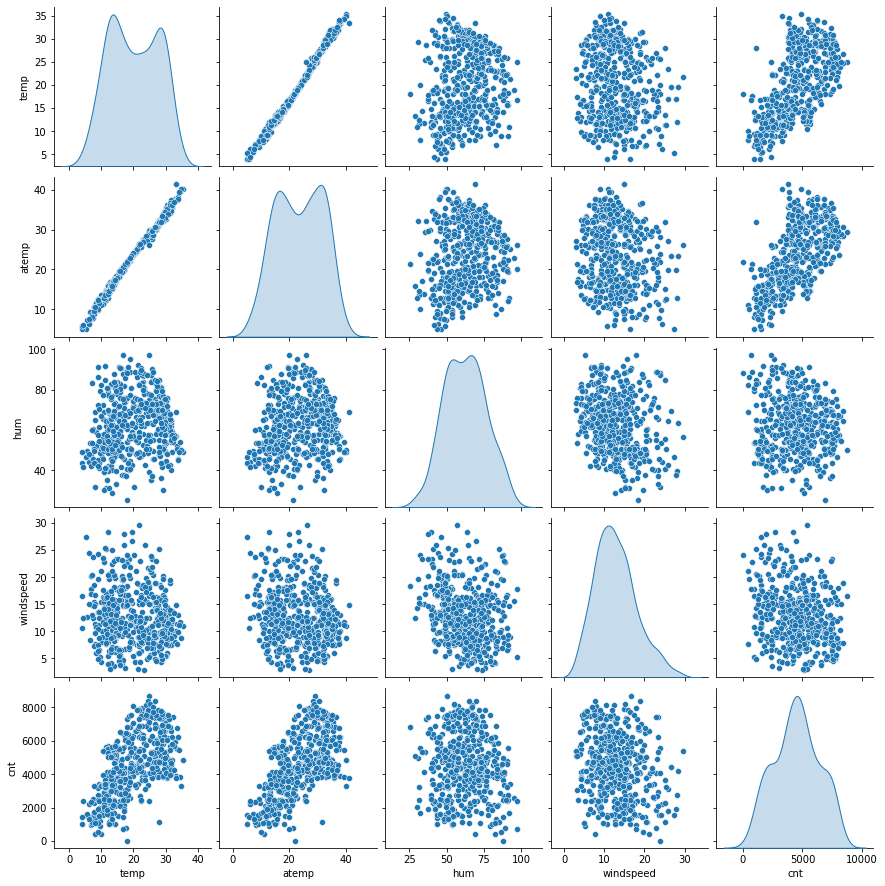

In [143]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

### Insights
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt' 

## Visualising Catagorical Variables

In [144]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 524 to 684
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      510 non-null    int64  
 1   yr          510 non-null    int64  
 2   mnth        510 non-null    int64  
 3   holiday     510 non-null    int64  
 4   weekday     510 non-null    int64  
 5   workingday  510 non-null    int64  
 6   weathersit  510 non-null    int64  
 7   temp        510 non-null    float64
 8   atemp       510 non-null    float64
 9   hum         510 non-null    float64
 10  windspeed   510 non-null    float64
 11  cnt         510 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 51.8 KB


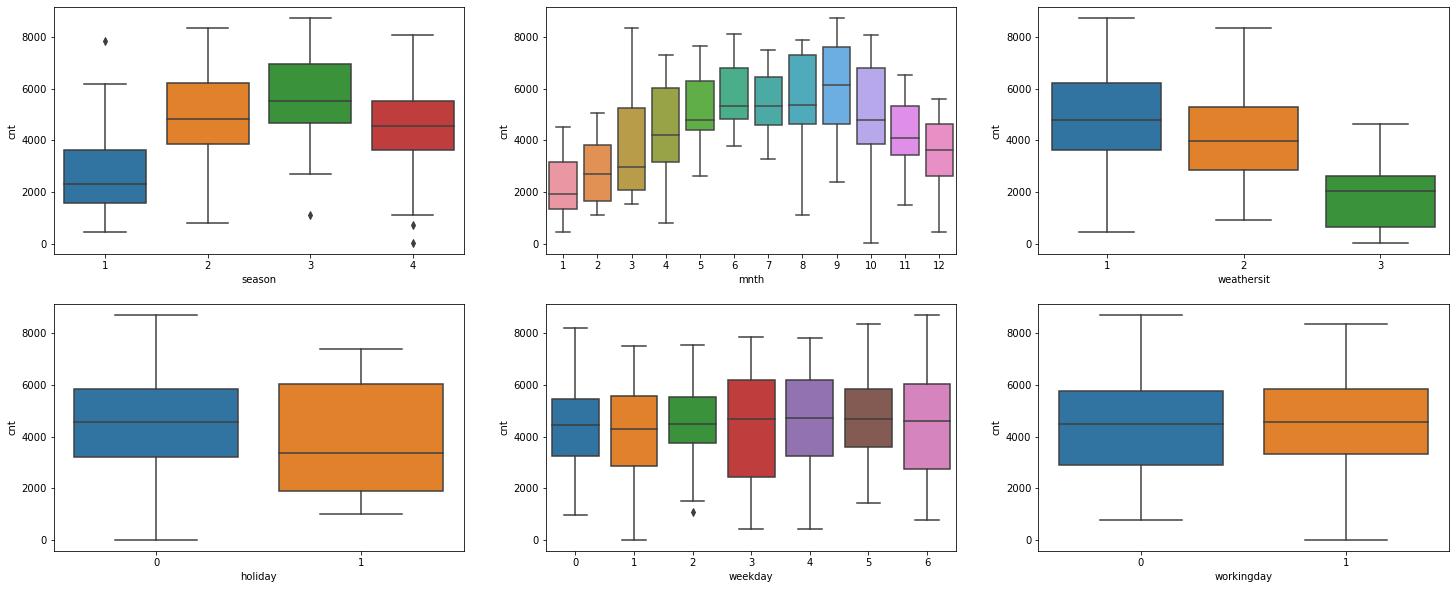

In [145]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_train)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_train)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_train)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_train)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_train)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_train)
plt.show()

### Insights
There were 6 categorical variables in the dataset. 

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) . 

The inference that We could derive were: 
- **season**: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

- **mnth**: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable. 
- **weathersit**: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
- **holiday**: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. 
- **weekday**: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
- **workingday**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

## Correlation Matrix

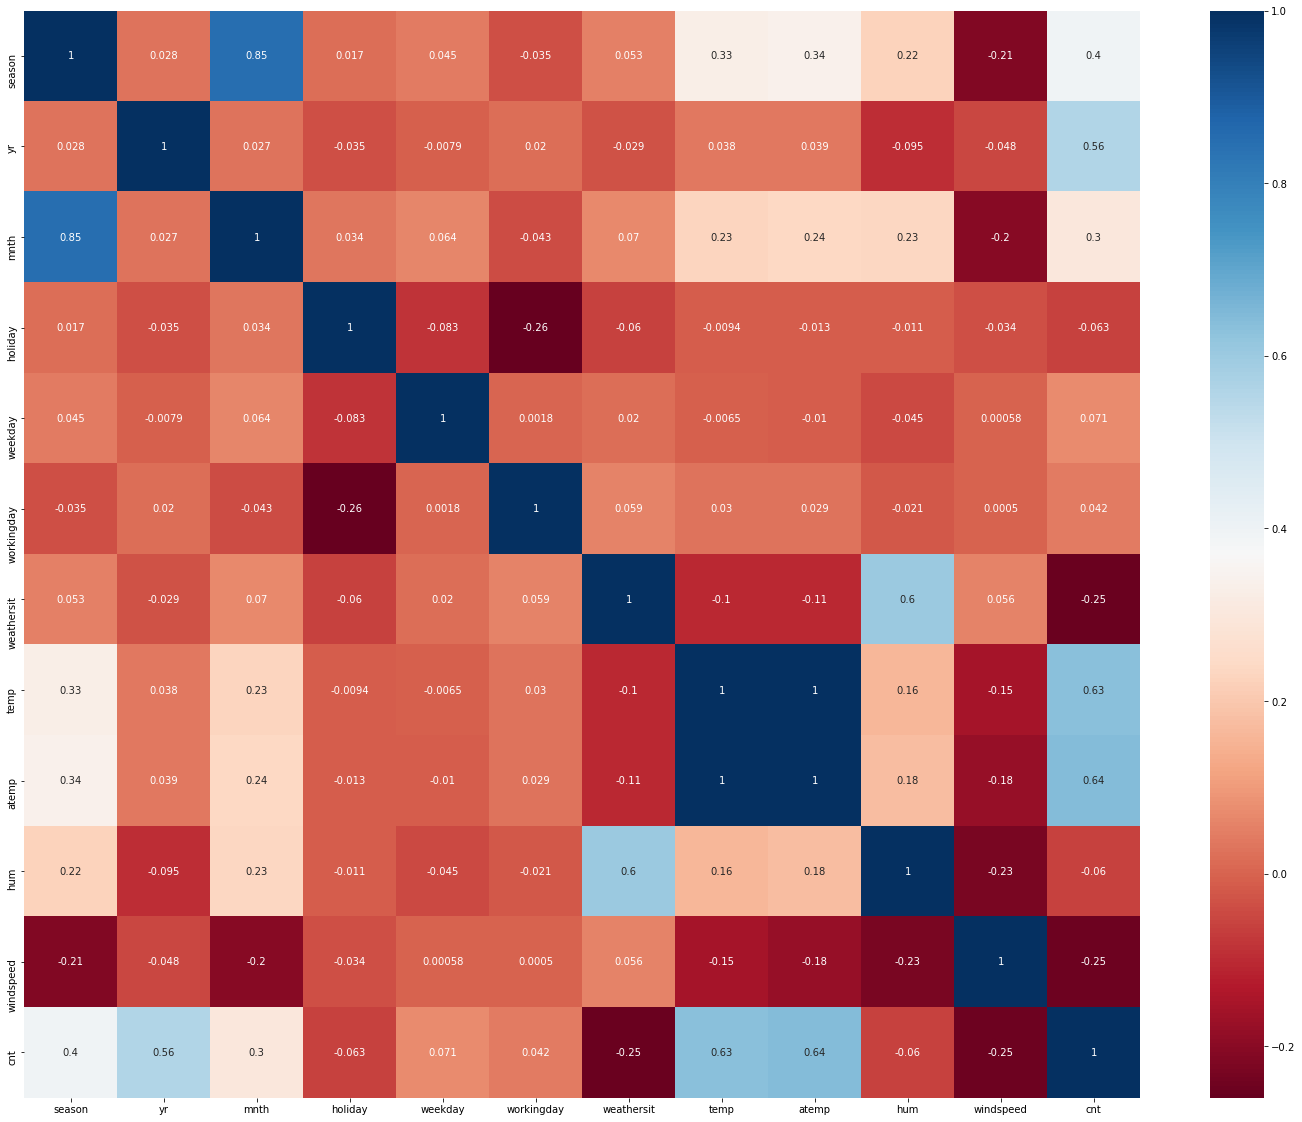

In [146]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdBu")
plt.show()

### Insights:
 - The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
 - We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

In [147]:
# Convert to 'category' data type

df_train['season']=df_train['season'].astype('category')
df_train['weathersit']=df_train['weathersit'].astype('category')
df_train['mnth']=df_train['mnth'].astype('category')
df_train['weekday']=df_train['weekday'].astype('category')

In [148]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

df_train_dummies = pd.get_dummies(df_train, drop_first=True)
df_train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 524 to 684
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

# RESCALING THE FEATURES

In [149]:
from sklearn.preprocessing import MinMaxScaler

In [150]:
scaler = MinMaxScaler()

In [151]:
# Checking the values before scaling
df_train_dummies.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
524,1,0,0,29.144153,32.41835,43.7083,9.667229,7498,1,0,...,0,0,0,0,0,0,0,1,0,0
12,0,0,1,6.765000,7.54415,47.0417,20.167000,1406,0,0,...,0,0,0,0,0,1,0,0,0,0
161,0,0,0,29.725000,33.90190,65.4583,10.374950,4966,1,0,...,0,0,0,0,0,0,0,1,0,0
556,1,0,1,29.383347,32.51355,63.3333,10.166111,7264,0,1,...,0,0,0,0,1,0,0,0,0,0
502,1,0,1,23.130847,27.55605,52.3333,9.166739,7639,1,0,...,0,0,0,0,0,0,1,0,0,0


In [152]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train_dummies[num_vars] = scaler.fit_transform(df_train_dummies[num_vars])
df_train_scaled=df_train_dummies

In [153]:
# Checking values after scaling
df_train_scaled.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
524,1,0,0,0.802869,0.755332,0.254640,0.255430,0.860101,1,0,...,0,0,0,0,0,0,0,1,0,0
12,0,0,1,0.089497,0.071535,0.301044,0.647940,0.159227,0,0,...,0,0,0,0,0,1,0,0,0,0
161,0,0,0,0.821384,0.796115,0.557424,0.281887,0.568799,1,0,...,0,0,0,0,0,0,0,1,0,0
556,1,0,1,0.810494,0.757949,0.527842,0.274080,0.833180,0,1,...,0,0,0,0,1,0,0,0,0,0
502,1,0,1,0.611185,0.621666,0.374709,0.236721,0.876323,1,0,...,0,0,0,0,0,0,1,0,0,0


In [154]:
df_train_scaled.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.029412,0.690196,0.514246,0.510028,0.514303,0.373352,0.514084,0.258824,0.254902,...,0.082353,0.082353,0.145098,0.143137,0.152941,0.141176,0.137255,0.145098,0.335294,0.023529
std,0.500487,0.169124,0.462867,0.242926,0.227571,0.194712,0.192759,0.217119,0.438419,0.436234,...,0.275172,0.275172,0.352545,0.350557,0.360284,0.348545,0.344454,0.352545,0.472557,0.151726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.301603,0.311891,0.361513,0.232054,0.365221,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.499006,0.512335,0.513631,0.352763,0.521859,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.732894,0.704135,0.651342,0.482854,0.670156,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# BUILDING A LINEAR MODEL

## Dividing into X and Y sets for the model building

In [155]:
y_train = df_train_scaled.pop('cnt')
X_train = df_train_scaled

### RFE
Recursive feature elimination: We will be using the **LinearRegression function from SciKit Learn**  for its compatibility with RFE (which is a utility from sklearn)

In [156]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [157]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [158]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 6),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 7),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 11),
 ('mnth_12', False, 15),
 ('weekday_1', False, 13),
 ('weekday_2', False, 14),
 ('weekday_3', False, 10),
 ('weekday_4', False, 9),
 ('weekday_5', False, 8),
 ('weekday_6', False, 4),
 ('weathersit_2', False, 3),
 ('weathersit_3', True, 1)]

In [159]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_3'],
      dtype='object')

In [160]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'mnth_2', 'mnth_6', 'mnth_7', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2'],
      dtype='object')

In [161]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Building Linear Model using 'STATS MODEL'

## Model 1

### VIF Check

In [162]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,1055.63
1,temp,1031.10
6,season_3,8.39
3,hum,8.08
5,season_2,6.47
4,windspeed,3.54
7,season_4,3.01
9,mnth_4,2.51
10,mnth_5,2.29
0,yr,1.98


In [163]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [164]:
# Check the parameters obtained

lr1.params

const           0.212118
yr              0.220459
temp           -0.111530
atemp           0.598192
hum            -0.230221
windspeed      -0.131148
season_2        0.104155
season_3        0.079814
season_4        0.147518
mnth_3          0.050179
mnth_4          0.027832
mnth_5          0.071235
mnth_8          0.046448
mnth_9          0.118447
mnth_10         0.061945
weathersit_3   -0.140437
dtype: float64

In [165]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     153.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          6.15e-175
Time:                        02:14:06   Log-Likelihood:                 497.89
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     494   BIC:                            -896.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2121      0.022      9.636   

## Model 2

- Removing the variable 'atemp' based on its High p-value & High VIF

In [166]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

### VIF Check

In [167]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,18.64
5,season_3,8.32
2,hum,6.99
4,season_2,6.42
3,windspeed,3.48
6,season_4,2.93
8,mnth_4,2.40
9,mnth_5,2.28
0,yr,1.97
10,mnth_8,1.68


In [168]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [169]:
# Check the parameters obtained

lr2.params

const           0.229989
yr              0.220596
temp            0.453024
hum            -0.223622
windspeed      -0.149258
season_2        0.101076
season_3        0.076272
season_4        0.151041
mnth_3          0.052943
mnth_4          0.037777
mnth_5          0.075655
mnth_8          0.042082
mnth_9          0.116603
mnth_10         0.063641
weathersit_3   -0.144700
dtype: float64

In [170]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     162.6
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          7.31e-175
Time:                        02:14:08   Log-Likelihood:                 495.05
No. Observations:                 510   AIC:                            -960.1
Df Residuals:                     495   BIC:                            -896.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2300      0.021     11.081   

## Model 3

 - Removing the variable 'hum' based on its Very High 'VIF' value.
 - Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [171]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

### VIF Check

In [172]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,15.11
4,season_3,8.14
3,season_2,6.39
2,windspeed,3.33
5,season_4,2.72
7,mnth_4,2.39
8,mnth_5,2.23
0,yr,1.96
11,mnth_10,1.68
9,mnth_8,1.67


In [173]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [174]:
lr3.params

const           0.117138
yr              0.228584
temp            0.423468
windspeed      -0.098315
season_2        0.101964
season_3        0.089824
season_4        0.139014
mnth_3          0.044833
mnth_4          0.033157
mnth_5          0.049335
mnth_8          0.024505
mnth_9          0.078309
mnth_10         0.053770
weathersit_3   -0.235448
dtype: float64

In [175]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          8.54e-160
Time:                        02:14:09   Log-Likelihood:                 456.50
No. Observations:                 510   AIC:                            -885.0
Df Residuals:                     496   BIC:                            -825.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1171      0.018      6.578   

## Model 4

- Removing the variable 'season3' based on its Very High 'VIF' value.
- Even though the VIF of season3 is second highest, we decided to drop 'season3' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [176]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

### VIF Check

In [177]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.77
3,season_2,4.31
2,windspeed,3.25
6,mnth_4,2.36
7,mnth_5,2.21
0,yr,1.93
4,season_4,1.93
10,mnth_10,1.63
8,mnth_8,1.49
5,mnth_3,1.31


In [178]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [179]:
# Check the parameters obtained

lr4.params

const           0.107211
yr              0.225867
temp            0.522020
windspeed      -0.100370
season_2        0.056726
season_4        0.113612
mnth_3          0.037995
mnth_4          0.043345
mnth_5          0.043121
mnth_8          0.047396
mnth_9          0.098805
mnth_10         0.040826
weathersit_3   -0.234251
dtype: float64

In [180]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     153.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.13e-158
Time:                        02:14:12   Log-Likelihood:                 450.15
No. Observations:                 510   AIC:                            -874.3
Df Residuals:                     497   BIC:                            -819.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1072      0.018      6.027   

## Model 5

- Removing the variable 'mnth_10' based on its Very High p-value.

In [181]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

### VIF Check

In [182]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.63
3,season_2,4.29
2,windspeed,3.24
6,mnth_4,2.36
7,mnth_5,2.21
0,yr,1.92
8,mnth_8,1.48
4,season_4,1.43
5,mnth_3,1.31
9,mnth_9,1.28


In [183]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [184]:
# Check the parameters obtained

lr5.params

const           0.102402
yr              0.225187
temp            0.532289
windspeed      -0.098219
season_2        0.054155
season_4        0.128543
mnth_3          0.039357
mnth_4          0.044947
mnth_5          0.043448
mnth_8          0.043612
mnth_9          0.093000
weathersit_3   -0.229322
dtype: float64

In [185]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     165.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.00e-158
Time:                        02:14:15   Log-Likelihood:                 447.95
No. Observations:                 510   AIC:                            -871.9
Df Residuals:                     498   BIC:                            -821.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1024      0.018      5.787   

## Model 6

- Removing the variable 'mnth_3' based on its High 'p-value'.

In [186]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

### VIF Check

In [187]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.61
3,season_2,3.93
2,windspeed,3.02
5,mnth_4,2.11
6,mnth_5,2.03
0,yr,1.91
7,mnth_8,1.47
4,season_4,1.41
8,mnth_9,1.27
9,weathersit_3,1.07


In [188]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [189]:
# Check the parameters obtained

lr6.params

const           0.112630
yr              0.225588
temp            0.520726
windspeed      -0.096374
season_2        0.065630
season_4        0.122377
mnth_4          0.027682
mnth_5          0.028358
mnth_8          0.041829
mnth_9          0.091188
weathersit_3   -0.229087
dtype: float64

In [190]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     180.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.65e-158
Time:                        02:14:21   Log-Likelihood:                 445.45
No. Observations:                 510   AIC:                            -868.9
Df Residuals:                     499   BIC:                            -822.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1126      0.017      6.568   

### Insights
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Final Model Interpretation

## Hypothesis Testing:

Hypothesis testing states that:
- H0:B1=B2=...=Bn=0 
- H1:  at least one  Bi!=0

### lr6 model coefficient values

- const 0.084143
- yr 0.230846
- workingday 0.043203
- temp 0.563615
- windspeed -0.155191
- season_2 0.082706
- season_4 0.128744
- mnth_9 0.094743
- weekday_6 0.056909
- weathersit_2 -0.074807
- weathersit_3 -0.306992

### Insights
- From the lr6 model summary, it is evident that all our coefficients are not equal to zerowhich means **We REJECT the NULL HYPOTHESIS**
    

### F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 233.8
- Prob (F-statistic): 3.77e-181

The F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

## The equation of best fitted surface based on model lr6:

cnt = 0.084143 + (**yr** × 0.230846) + (**workingday** × 0.043203) + (**temp** × 0.563615) − (**windspeed** × 0.155191) + (**season2** × 0.082706) + (**season4** ×0.128744) + (**mnth9** × 0.094743) + (**weekday6** ×0.056909) − (**weathersit2** × 0.074807) − (**weathersit3** × 0.306992)

## Interpretation of Coefficients:
**temp:** A coefficient value of ‘0.5636’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5636 units.

**weathersit_3:** A coefficient value of ‘-0.3070’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.3070 units.

**yr:** A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2308 units.

**season_4:** A coefficient value of ‘0.128744’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units.

**windspeed:** A coefficient value of ‘-0.155191’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units.

**workingday:** A coefficient value of ‘0.043203’ indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.043203 units.

**season_2:** A coefficient value of ‘0.082706’ indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.082706 units.

**mnth_9:** A coefficient value of ‘0.094743’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.094743 units.

**weekday_6:** A coefficient value of ‘0.056909’ indicated that w.r.t weekday_1, a unit increase in weekday_6 variable increases the bike hire numbers by 0.056909 units.

**weathersit_2:** A coefficient value of ‘-0.074807’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.074807 units.

**const:** The Constant value of ‘0.084143’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.084143 units.

# ASSUMPTIONS 

## Error terms are normally distributed with mean zero (not X, Y)
- Residual Analysis Of Training Data

In [191]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

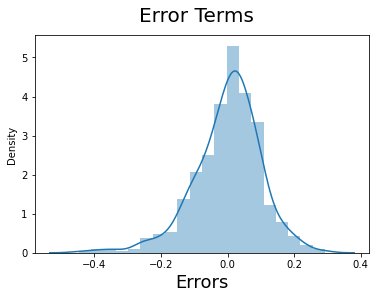

In [192]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Insights
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## There is a linear relationship between X and Y

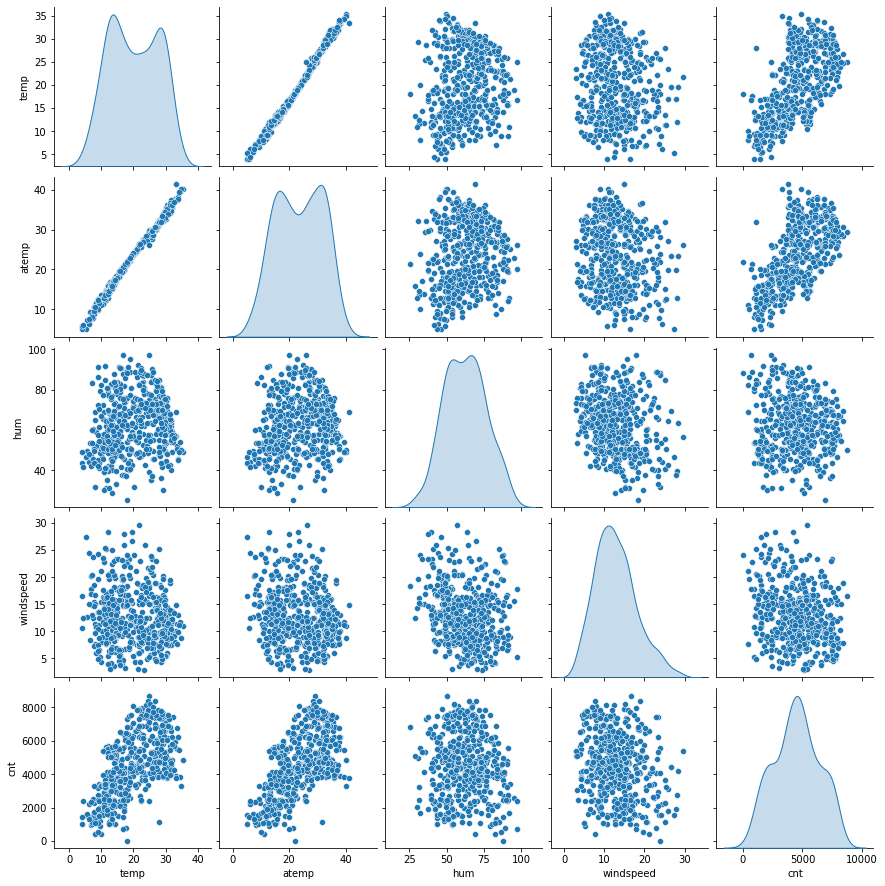

In [193]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

## Insight
- Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

## There is No Multicollinearity between the predictor variables

In [194]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.61
3,season_2,3.93
2,windspeed,3.02
5,mnth_4,2.11
6,mnth_5,2.03
0,yr,1.91
7,mnth_8,1.47
4,season_4,1.41
8,mnth_9,1.27
9,weathersit_3,1.07


## Insight

 - From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

### Applying the scaling on the test sets

In [195]:
# Convert to 'category' data type

df_test['season']=df_test['season'].astype('category')
df_test['weathersit']=df_test['weathersit'].astype('category')
df_test['mnth']=df_test['mnth'].astype('category')
df_test['weekday']=df_test['weekday'].astype('category')

In [196]:
df_test_dummies=pd.get_dummies(df_test,drop_first= True)
df_test_dummies.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
196,0,0,0,28.153347,31.91315,58.5000,13.958914,5923,0,1,...,0,0,0,0,0,0,0,1,0,0
187,0,0,1,30.750000,34.34355,65.1250,10.666400,4592,0,1,...,0,0,0,0,0,1,0,0,0,0
14,0,0,0,9.566653,12.40560,49.8750,10.583521,1248,0,0,...,0,0,0,0,0,0,0,1,1,0
31,0,0,1,7.879134,11.72650,82.9565,3.565271,1360,0,0,...,0,0,0,1,0,0,0,0,1,0
390,1,0,1,14.008347,17.80250,76.9583,4.917519,4075,0,0,...,0,0,0,0,0,1,0,0,1,0


In [197]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test_dummies[num_vars] = scaler.transform(df_test_dummies[num_vars])
df_test_scaled=df_test_dummies
df_test_scaled.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
196,0,0,0,0.771285,0.741444,0.460557,0.415865,0.678900,0,1,...,0,0,0,0,0,0,0,1,0,0
187,0,0,1,0.854058,0.808256,0.552784,0.292782,0.525771,0,1,...,0,0,0,0,0,1,0,0,0,0
14,0,0,0,0.178804,0.205177,0.340487,0.289684,0.141049,0,0,...,0,0,0,0,0,0,0,1,1,0
31,0,0,1,0.125012,0.186509,0.801018,0.027323,0.153935,0,0,...,0,0,0,1,0,0,0,0,1,0
390,1,0,1,0.320391,0.353539,0.717517,0.077873,0.466291,0,0,...,0,0,0,0,0,1,0,0,1,0


In [198]:
df_test_scaled.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
196,0,0,0,0.771285,0.741444,0.460557,0.415865,0.678900,0,1,...,0,0,0,0,0,0,0,1,0,0
187,0,0,1,0.854058,0.808256,0.552784,0.292782,0.525771,0,1,...,0,0,0,0,0,1,0,0,0,0
14,0,0,0,0.178804,0.205177,0.340487,0.289684,0.141049,0,0,...,0,0,0,0,0,0,0,1,1,0
31,0,0,1,0.125012,0.186509,0.801018,0.027323,0.153935,0,0,...,0,0,0,1,0,0,0,0,1,0
390,1,0,1,0.320391,0.353539,0.717517,0.077873,0.466291,0,0,...,0,0,0,0,0,1,0,0,1,0


In [199]:
df_test_scaled.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.027273,0.668182,0.538518,0.531124,0.532982,0.366151,0.520799,0.236364,0.263636,...,0.081818,0.090909,0.140909,0.140909,0.113636,0.145455,0.154545,0.140909,0.340909,0.040909
std,0.501120,0.163248,0.471940,0.230286,0.215465,0.205931,0.197966,0.235684,0.425817,0.441609,...,0.274713,0.288135,0.348721,0.348721,0.318093,0.353363,0.362295,0.348721,0.475096,0.198531
min,0.000000,0.000000,0.000000,-0.048868,-0.027173,-0.353829,-0.049874,0.067073,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.360687,0.371366,0.387181,0.227015,0.355442,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.565441,0.568312,0.527552,0.327069,0.520191,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.722547,0.695249,0.678244,0.465036,0.722964,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.982573,1.019965,0.986079,1.165056,0.981707,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [200]:
y_test = df_test_scaled.pop('cnt')
X_test = df_test_scaled
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 196 to 235
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   season_2      220 non-null    uint8  
 8   season_3      220 non-null    uint8  
 9   season_4      220 non-null    uint8  
 10  mnth_2        220 non-null    uint8  
 11  mnth_3        220 non-null    uint8  
 12  mnth_4        220 non-null    uint8  
 13  mnth_5        220 non-null    uint8  
 14  mnth_6        220 non-null    uint8  
 15  mnth_7        220 non-null    uint8  
 16  mnth_8        220 non-null    uint8  
 17  mnth_9        220 non-null    uint8  
 18  mnth_10       220 non-null  

In [201]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 196 to 235
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   temp          220 non-null    float64
 3   windspeed     220 non-null    float64
 4   season_2      220 non-null    uint8  
 5   season_4      220 non-null    uint8  
 6   mnth_4        220 non-null    uint8  
 7   mnth_5        220 non-null    uint8  
 8   mnth_8        220 non-null    uint8  
 9   mnth_9        220 non-null    uint8  
 10  weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(7)
memory usage: 10.1 KB


In [202]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

# MODEL EVALUATION

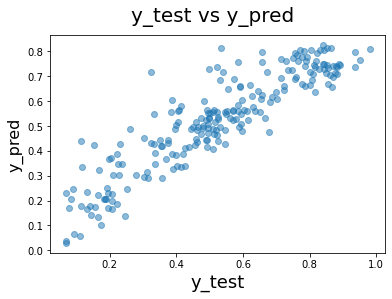

In [203]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

 # R^2 Value for TEST

In [208]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.8084860348572793

## Adjusted R^2 Value for TEST

In [212]:
# Get the shape of X_test
X_test.shape


(220, 10)

In [213]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7993226872427951

# Final Result Comparison

- Train R^2 :0.824
- Train Adjusted R^2 :0.821 
- Test R^2 :0.820
- Test Adjusted R^2 :0.812 
- This seems to be a really good model that can very well 'Generalize' various datasets.

# FINAL REPORT

As per our final Model, the top 3 predictor variables that influences the bike booking are: 
- **Temperature (temp)** - A coefficient value of ‘0.5636’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5636 units. 
- **Weather Situation 3 (weathersit_3)** - A coefficient value of ‘-0.3070’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3070 units.
- **Year (yr)** - A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2308 units. 

#### So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

The next best features that can also be considered are 
- **season_4:** - A coefficient value of ‘0.128744’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units. 
- **windspeed:** - A coefficient value of ‘-0.155191’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units. 

 #### NOTE: 
 - The details of weathersit_1 & weathersit_3 
 - **weathersit_1:** Clear, Few clouds, Partly cloudy, Partly cloudy
 - **weathersit_3:** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
 
 
 The details of season1 & season4 
 - **season1:** spring 
 - **season4:** winter